In [ ]:
from torchvision import datasets
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize, Lambda, transforms
from torch.utils.data import DataLoader, Subset
import sys
import os
sys.path.append(os.path.dirname(sys.path[0]))
import utils.misc as misc
import pandas as pd
import torch
import matplotlib.pyplot as plt
from PIL import Image
import random
import numpy as np

In [ ]:
transform = Compose([
            ToTensor(),
            Normalize((0.1307,), (0.3081,)),
            Lambda(lambda x: torch.flatten(x))
            ])
train_dataset = MNIST('/home/datasets/SNN/', train=True, download=False, transform=transform)
test_dataset = MNIST('/home/datasets/SNN/', train=False, download=False, transform=transform) 

In [ ]:
i,y = train_dataset[0]
i

In [2]:
from torchvision import datasets
from torchvision.transforms import Compose, ToTensor
from PIL import Image
import numpy as np
import random
from torchvision import datasets
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize, Lambda, transforms
from torch.utils.data import DataLoader, Subset
import sys
import os
sys.path.append(os.path.dirname(sys.path[0]))
import utils.misc as misc
import pandas as pd
import torch
import matplotlib.pyplot as plt
from PIL import Image
import random
import numpy as np
# class RandomPadToSize(object):
#     def __init__(self, target_size):
#         self.target_size = target_size

#     def __call__(self, image):
#         width, height = image.size
#         left = random.randint(0, self.target_size - width)
#         top = random.randint(0, self.target_size - height)
#         new_image = Image.new("L", (self.target_size, self.target_size), 0)
#         new_image.paste(image, (left, top))
#         return new_image
transform = Compose([
            ToTensor(),
            Normalize((0.1307,), (0.3081,)),
            Lambda(lambda x: torch.flatten(x))
            ])
train_dataset = MNIST('/home/datasets/SNN/', train=True, download=False, transform=transform)
test_dataset = MNIST('/home/datasets/SNN/', train=False, download=False, transform=transform) 

def place_mnist_in_black_background(image):
    # 创建一个100x100的黑色像素画布
    background = np.zeros((200, 200))
    
    # 随机选择图像的位置
    x = random.randint(0, 200 - 28)  # 28是MNIST图像的宽度
    y = random.randint(0, 200 - 28)  # 28是MNIST图像的高度
    
    # 将图像复制到黑色背景中的随机位置
    background[y:y+28, x:x+28] = image
    
    return background

# 遍历训练数据集，并将每个图像放置在100x100的黑色像素中
for i in range(len(train_dataset)):
    image, label = train_dataset[i]
    
    # 将torch.Tensor还原为28x28的二维图像
    image = image.view(28, 28).numpy()
    
    # 将图像放置在黑色背景中
    image_in_background = place_mnist_in_black_background(image)
    image_in_background = torch.tensor(image_in_background)





tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt

# 自定义数据集类，继承自torch.utils.data.Dataset
class CustomMNISTDataset(Dataset):
    def __init__(self, mnist_dataset):
        self.mnist_dataset = mnist_dataset

    def __len__(self):
        return len(self.mnist_dataset)

    def __getitem__(self, index):
        image, label = self.mnist_dataset[index]

        # 将图像放置在100x100的黑色像素中
        image = self.place_mnist_in_black_background(image)

        return image, label

    def place_mnist_in_black_background(self, image):
        # 创建一个100x100的黑色像素画布
        background = np.zeros((200, 200))

        # 随机选择图像的位置
        x = random.randint(0, 200 - 28)  # 28是MNIST图像的宽度
        y = random.randint(0, 200 - 28)  # 28是MNIST图像的高度

        # 将图像复制到黑色背景中的随机位置
        background[y:y+28, x:x+28] = image

        return background

# 创建原始的MNIST数据集
original_train_dataset = MNIST('/home/datasets/SNN/', train=True, download=False, transform=transforms.Compose([transforms.ToTensor()]))

# 使用自定义数据集类创建新数据集
custom_train_dataset = CustomMNISTDataset(original_train_dataset)

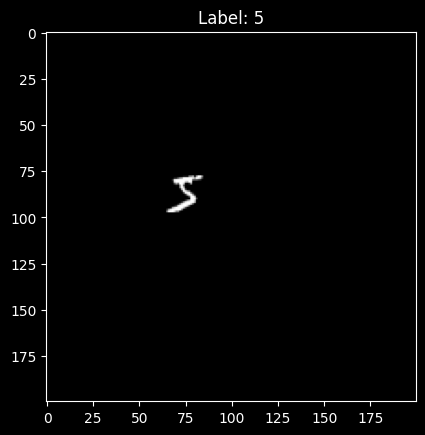

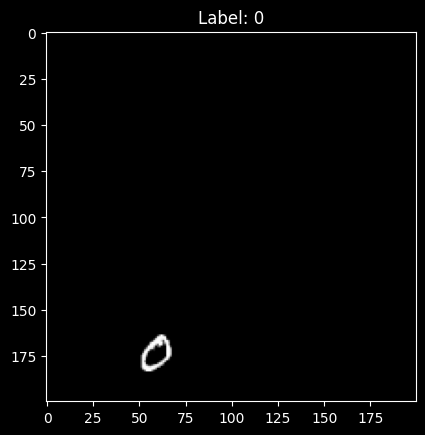

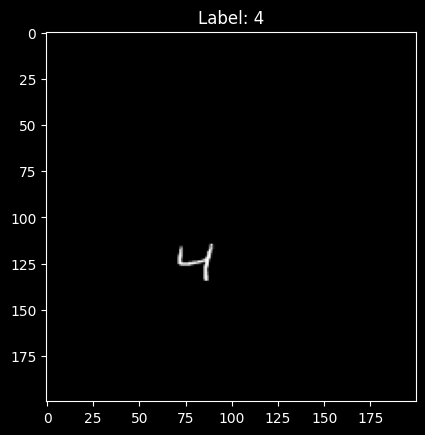

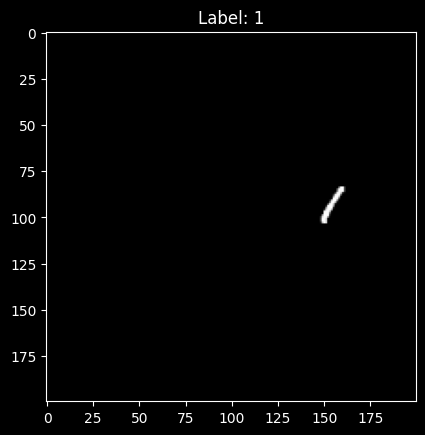

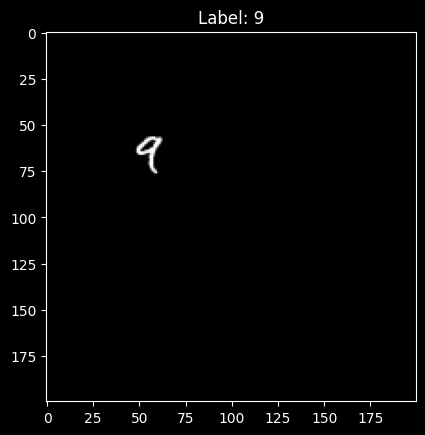

In [6]:
for i in range(5):  # 显示前5个图像
    image, label = custom_train_dataset[i]

    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.show()